In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bengaluru_House_Data (3).csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.drop('society',axis=1,inplace=True)

In [ ]:
df.dropna(subset=['location','size'],inplace=True)

<Axes: >

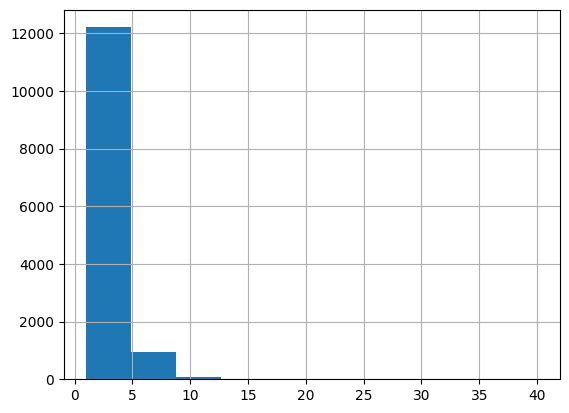

In [ ]:
df['bath'].hist()

<Axes: >

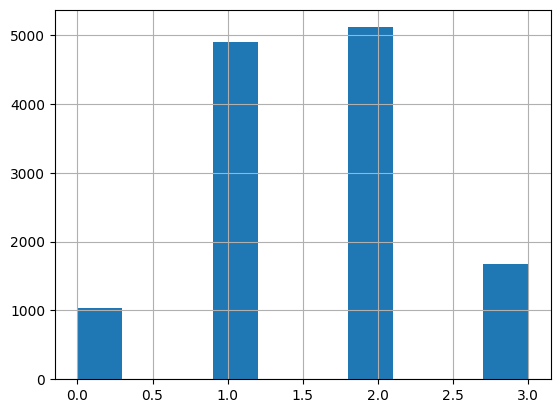

In [ ]:
df['balcony'].hist()

In [ ]:
df['bath'].fillna(df['bath'].mean(),inplace=True)
df['balcony'].fillna(df['balcony'].mean(),inplace=True)

/tmp/ipython-input-287511397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].mean(),inplace=True)
/tmp/ipython-input-287511397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df.duplicated().sum()

np.int64(568)

In [ ]:
df.shape

(13303, 8)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(12735, 8)

In [ ]:
print(df['area_type'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['area_type']=le.fit_transform(df['area_type'])
df['location']=le.fit_transform(df['location'])

In [ ]:
print(df['availability'].unique())

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov'
 '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov'
 '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']


In [ ]:
df['availability'] = df['availability'].replace("Ready To Move", pd.NaT)

df['availability'] = pd.to_datetime(
    df['availability'],
    format="%d-%b",
    errors='coerce'
)

In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,1900-12-19,419,2 BHK,1056,2.0,1.000000,39.07
1,2,NaT,317,4 Bedroom,2600,5.0,3.000000,120.00
2,0,NaT,1178,3 BHK,1440,2.0,3.000000,62.00
3,3,NaT,756,3 BHK,1521,3.0,1.000000,95.00
4,3,NaT,715,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...
13314,3,NaT,474,3 BHK,1715,3.0,3.000000,112.00
13315,0,NaT,1251,5 Bedroom,3453,4.0,0.000000,231.00
13316,3,NaT,1003,4 BHK,3600,5.0,1.584343,400.00
13317,0,NaT,971,2 BHK,1141,2.0,1.000000,60.00


In [ ]:
df['availability'].fillna(df['availability'].median(),inplace=True)

/tmp/ipython-input-1442938058.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['availability'].fillna(df['availability'].median(),inplace=True)


In [ ]:
print(df['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [ ]:
def split_feature(value):
  if 'BHK' in value:
    bedroom = int(value.split()[0])
    hall = 1
    kitchen = 1
  elif 'Bedroom' in value:
    bedroom = int(value.split()[0])
    hall=0
    kitchen = 0
  elif value == '1 RK':
    bedroom = 1
    hall = 0
    kitchen = 0
  else:
    bedroom = None
    hall = None
    kitchen = None
  return bedroom, hall, kitchen


df[['Bedroom','Hall','Kitchen']]=df['size'].apply(lambda x: pd.Series(split_feature(x)))

df

,area_type,availability,location,size,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen
0,3,1900-12-19,419,2 BHK,1056,2.0,1.000000,39.07,2,1,1
1,2,1900-07-18,317,4 Bedroom,2600,5.0,3.000000,120.00,4,0,0
2,0,1900-07-18,1178,3 BHK,1440,2.0,3.000000,62.00,3,1,1
3,3,1900-07-18,756,3 BHK,1521,3.0,1.000000,95.00,3,1,1
4,3,1900-07-18,715,2 BHK,1200,2.0,1.000000,51.00,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13314,3,1900-07-18,474,3 BHK,1715,3.0,3.000000,112.00,3,1,1
13315,0,1900-07-18,1251,5 Bedroom,3453,4.0,0.000000,231.00,5,0,0
13316,3,1900-07-18,1003,4 BHK,3600,5.0,1.584343,400.00,4,1,1
13317,0,1900-07-18,971,2 BHK,1141,2.0,1.000000,60.00,2,1,1


In [ ]:
df.drop('size',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
Bedroom,0
Hall,0
Kitchen,0


In [ ]:
df["month"]=df["availability"].dt.month
df['year']=df['availability'].dt.year
df['day']=df['availability'].dt.day

In [ ]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen,month,year,day
0,3,1900-12-19,419,1056,2.0,1.000000,39.07,2,1,1,12,1900,19
1,2,1900-07-18,317,2600,5.0,3.000000,120.00,4,0,0,7,1900,18
2,0,1900-07-18,1178,1440,2.0,3.000000,62.00,3,1,1,7,1900,18
3,3,1900-07-18,756,1521,3.0,1.000000,95.00,3,1,1,7,1900,18
4,3,1900-07-18,715,1200,2.0,1.000000,51.00,2,1,1,7,1900,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3,1900-07-18,474,1715,3.0,3.000000,112.00,3,1,1,7,1900,18
13315,0,1900-07-18,1251,3453,4.0,0.000000,231.00,5,0,0,7,1900,18
13316,3,1900-07-18,1003,3600,5.0,1.584343,400.00,4,1,1,7,1900,18
13317,0,1900-07-18,971,1141,2.0,1.000000,60.00,2,1,1,7,1900,18


In [ ]:
df.drop('availability',axis=1,inplace=True)

In [ ]:
df

,area_type,location,total_sqft,bath,balcony,price,Bedroom,Hall,Kitchen,month,year,day
0,3,419,1056,2.0,1.000000,39.07,2,1,1,12,1900,19
1,2,317,2600,5.0,3.000000,120.00,4,0,0,7,1900,18
2,0,1178,1440,2.0,3.000000,62.00,3,1,1,7,1900,18
3,3,756,1521,3.0,1.000000,95.00,3,1,1,7,1900,18
4,3,715,1200,2.0,1.000000,51.00,2,1,1,7,1900,18
...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3,474,1715,3.0,3.000000,112.00,3,1,1,7,1900,18
13315,0,1251,3453,4.0,0.000000,231.00,5,0,0,7,1900,18
13316,3,1003,3600,5.0,1.584343,400.00,4,1,1,7,1900,18
13317,0,971,1141,2.0,1.000000,60.00,2,1,1,7,1900,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12735 entries, 0 to 13318
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12735 non-null  int64  
 1   location    12735 non-null  int64  
 2   total_sqft  12735 non-null  object 
 3   bath        12735 non-null  float64
 4   balcony     12735 non-null  float64
 5   price       12735 non-null  float64
 6   Bedroom     12735 non-null  int64  
 7   Hall        12735 non-null  int64  
 8   Kitchen     12735 non-null  int64  
 9   month       12735 non-null  int32  
 10  year        12735 non-null  int32  
 11  day         12735 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
df["total_sqft"]=pd.to_numeric(df["total_sqft"],errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12735 entries, 0 to 13318
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12735 non-null  int64  
 1   location    12735 non-null  int64  
 2   total_sqft  12497 non-null  float64
 3   bath        12735 non-null  float64
 4   balcony     12735 non-null  float64
 5   price       12735 non-null  float64
 6   Bedroom     12735 non-null  int64  
 7   Hall        12735 non-null  int64  
 8   Kitchen     12735 non-null  int64  
 9   month       12735 non-null  int32  
 10  year        12735 non-null  int32  
 11  day         12735 non-null  int32  
dtypes: float64(4), int32(3), int64(5)
memory usage: 1.1 MB


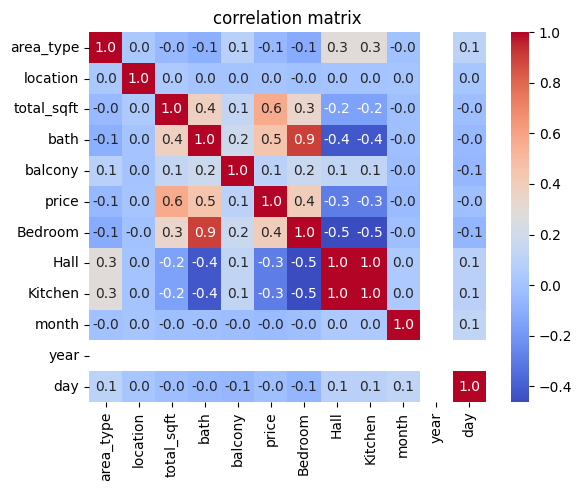

In [ ]:
corr_matrix=df.corr()

sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [ ]:
df.drop(['year','bath','Hall'],axis=1,inplace= True)

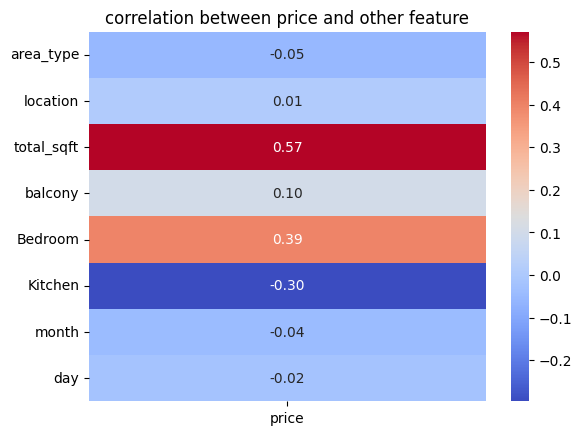

In [ ]:
price_corr=df.corr()['price']

price_corr=price_corr.drop('price')

sns.heatmap(price_corr.to_frame(),annot=True,fmt='0.2f',cmap='coolwarm',annot_kws={'size': 10})

plt.title('correlation between price and other feature')
plt.show()

In [ ]:
df.drop(['day','month','location','area_type'],axis=1,inplace=True)

<Axes: >

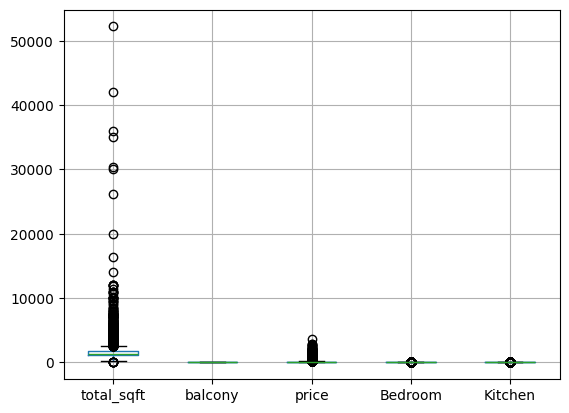

In [ ]:
df.boxplot()

In [ ]:
def remove_outlier(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
  return df
df_cleaned = remove_outlier(df, exclude_column='price')
df=df_cleaned




In [ ]:
df.shape

(9421, 5)

In [ ]:
df

,total_sqft,balcony,price,Bedroom,Kitchen
0,1056.0,1.000000,39.07,2,1
2,1440.0,3.000000,62.00,3,1
3,1521.0,1.000000,95.00,3,1
4,1200.0,1.000000,51.00,2,1
5,1170.0,1.000000,38.00,2,1
...,...,...,...,...,...
13309,1675.0,1.584343,92.13,3,1
13310,1050.0,2.000000,52.71,2,1
13312,1262.0,2.000000,47.00,2,1
13314,1715.0,3.000000,112.00,3,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

feature=['total_sqft','balcony','Bedroom','Kitchen']

scaler=MinMaxScaler()

scaler_data=scaler.fit_transform(df[feature])

scaler_df=pd.DataFrame(scaler_data,columns=feature)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

x=df[['total_sqft','balcony','Bedroom','Kitchen']]
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=40)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
model.score(x_test,y_test)


0.5300151670267443